Utilizando la base de datos Kakadu realice lo siguiente:

1) Estadisticos descriptivos, para explicar la BD. Recuerde utilizar todo lo aprendido en el curso
2)Cree una hipótesis que se pueda comprobar utilizando regresión lineal, y compruebe si se cumple.
3)Cree una hipótesis de clasificación, y compruebe si se cumple.

# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

In [2]:
DATA = pd.read_csv('Kakadu.csv')

## 1) Descriptivos

In [4]:
DATA.head()

,lower,upper,answer,recparks,jobs,lowrisk,wildlife,future,aboriginal,finben,...,gov,envcon,vparks,tvenv,conservation,sex,age,schooling,income,major
0,0,2,nn,3,1,5,5,1,1,1,...,1,yes,yes,1,no,male,27,3,25,no
1,0,2,nn,5,5,3,5,5,1,5,...,2,no,yes,3,no,female,32,4,9,no
2,0,2,nn,4,4,5,3,5,1,5,...,2,no,yes,2,no,male,32,4,25,yes
3,0,2,nn,1,2,4,5,3,4,3,...,1,yes,no,1,yes,female,70,6,25,no
4,0,2,nn,2,4,5,3,1,3,4,...,1,no,yes,3,no,male,32,5,35,yes


In [33]:
len(DATA)

1827

In [6]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   lower         1827 non-null   int64 
 1   upper         1827 non-null   int64 
 2   answer        1827 non-null   object
 3   recparks      1827 non-null   int64 
 4   jobs          1827 non-null   int64 
 5   lowrisk       1827 non-null   int64 
 6   wildlife      1827 non-null   int64 
 7   future        1827 non-null   int64 
 8   aboriginal    1827 non-null   int64 
 9   finben        1827 non-null   int64 
 10  mineparks     1827 non-null   int64 
 11  moreparks     1827 non-null   int64 
 12  gov           1827 non-null   int64 
 13  envcon        1827 non-null   object
 14  vparks        1827 non-null   object
 15  tvenv         1827 non-null   int64 
 16  conservation  1827 non-null   object
 17  sex           1827 non-null   object
 18  age           1827 non-null   int64 
 19  school

In [8]:
DATA.columns

Index(['lower', 'upper', 'answer', 'recparks', 'jobs', 'lowrisk', 'wildlife',
       'future', 'aboriginal', 'finben', 'mineparks', 'moreparks', 'gov',
       'envcon', 'vparks', 'tvenv', 'conservation', 'sex', 'age', 'schooling',
       'income', 'major'],
      dtype='object')

In [9]:
DATA.describe ()

,lower,upper,recparks,jobs,lowrisk,wildlife,future,aboriginal,finben,mineparks,moreparks,gov,tvenv,age,schooling,income
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,48.594964,536.714286,3.688560,2.592228,2.790367,4.739464,4.466886,3.569787,2.915709,3.643678,3.864806,1.083196,1.785441,42.968254,3.683634,21.656814
std,69.087719,478.512134,1.210078,1.294780,1.403467,0.651893,0.863253,1.265831,1.345761,1.351855,1.227114,0.304542,1.319226,17.113278,1.754222,16.442036
min,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,0.000000,3.000000
25%,0.000000,20.000000,3.000000,1.000000,1.000000,5.000000,4.000000,3.000000,2.000000,3.000000,3.000000,1.000000,1.000000,32.000000,3.000000,9.000000
50%,20.000000,999.000000,4.000000,2.000000,3.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,1.000000,1.000000,37.000000,4.000000,16.000000
75%,50.000000,999.000000,5.000000,3.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.000000,2.000000,52.000000,5.000000,26.000000
max,250.000000,999.000000,5.000000,5.000000,5.000000,5.000000,9.000000,5.000000,5.000000,5.000000,5.000000,4.000000,9.000000,70.000000,8.000000,100.000000


<Axes: xlabel='vparks', ylabel='count'>

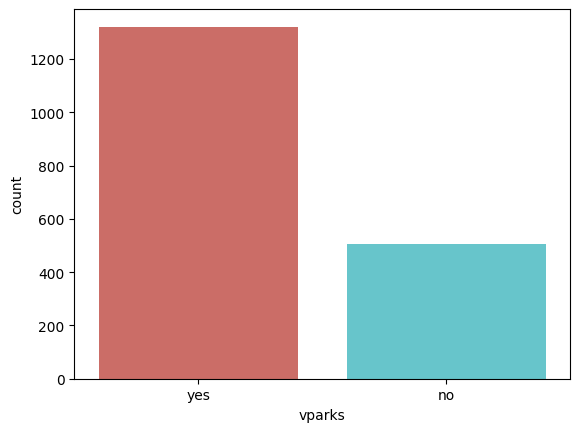

In [34]:
sns.countplot(x='vparks' , data=DATA , palette='hls')

<Axes: xlabel='conservation', ylabel='count'>

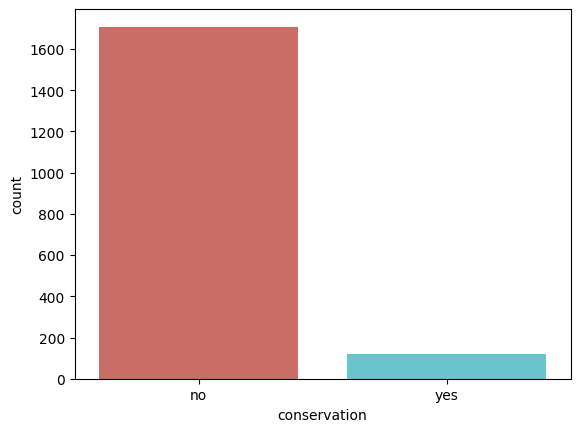

In [17]:
sns.countplot(x='conservation' , data=DATA , palette='hls')

In [35]:
DATA['vparks'].describe 

<bound method NDFrame.describe of 0       yes
1       yes
2       yes
3        no
4       yes
       ... 
1822    yes
1823    yes
1824    yes
1825    yes
1826    yes
Name: vparks, Length: 1827, dtype: object>

In [23]:
DATA['conservation'].describe 

<bound method NDFrame.describe of 0        no
1        no
2        no
3       yes
4        no
       ... 
1822     no
1823     no
1824     no
1825     no
1826     no
Name: conservation, Length: 1827, dtype: object>

In [36]:
DATA['vparks'].value_counts()

vparks
yes    1321
no      506
Name: count, dtype: int64

In [25]:
DATA['conservation'].value_counts()

conservation
no     1708
yes     119
Name: count, dtype: int64

## 2)  Hipótesis 1

Hipótesis: Que la persona pertenezca a una organización conservadora influye en su asistencia a parques naturales.

In [54]:
VPARKS = pd.get_dummies(DATA['vparks'], prefix='vparks', drop_first=True).astype(int)
VPARKS.head()

,vparks_yes
0,1
1,1
2,1
3,0
4,1


In [53]:
CONSERVATION = pd.get_dummies(DATA['conservation'], prefix='conservation', drop_first=True).astype(int)
CONSERVATION.head()

,conservation_yes
0,0
1,0
2,0
3,1
4,0


In [59]:
DATA = pd.concat([DATA, VPARKS], axis=1)
DATA = pd.concat([DATA, CONSERVATION], axis=1)

In [60]:
DATA.head()

,lower,upper,answer,recparks,jobs,lowrisk,wildlife,future,aboriginal,finben,...,vparks,tvenv,conservation,sex,age,schooling,income,major,vparks_yes,conservation_yes
0,0,2,nn,3,1,5,5,1,1,1,...,yes,1,no,male,27,3,25,no,1,0
1,0,2,nn,5,5,3,5,5,1,5,...,yes,3,no,female,32,4,9,no,1,0
2,0,2,nn,4,4,5,3,5,1,5,...,yes,2,no,male,32,4,25,yes,1,0
3,0,2,nn,1,2,4,5,3,4,3,...,no,1,yes,female,70,6,25,no,0,1
4,0,2,nn,2,4,5,3,1,3,4,...,yes,3,no,male,32,5,35,yes,1,0


In [62]:
est = smf.ols(formula='conservation_yes ~ vparks_yes', data=DATA).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       conservation_yes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     19.91
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           8.62e-06
Time:                        20:13:58   Log-Likelihood:                -25.914
No. Observations:                1827   AIC:                             55.83
Df Residuals:                    1825   BIC:                             66.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0237      0.011      2.172      0.030       0.002       0.045
vparks_yes     0.0573      0.013      4.462      0.000       0.032       0.082
==============================================================================
Omnibus:                     1286.892   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11521.858
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                      13.166   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Respuesta: Que la persona pertenezca o no a una organización conservadora no muestra una relación robusta a su asistencia a parques naturales en los últimos 12 meses.

## 3) Hipótesis 2

Hipótesis: Una persona es parte de una organización de conservación debido a su preocupación por la vida salvaje, los aborigenes, el riesgo y la cantidad de parques.

In [64]:
formula_reg_log = "conservation_yes ~ wildlife + aboriginal + lowrisk + moreparks"
modelo_log = smf.logit(formula_reg_log, DATA).fit()
modelo_log.summary()

Optimization terminated successfully.
         Current function value: 0.229847
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       conservation_yes   No. Observations:                 1827
Model:                          Logit   Df Residuals:                     1822
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Jun 2023   Pseudo R-squ.:                 0.04575
Time:                        20:37:16   Log-Likelihood:                -419.93
converged:                       True   LL-Null:                       -440.06
Covariance Type:            nonrobust   LLR p-value:                 3.813e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8053      1.143     -4.204      0.000      -7.045      -2.565
wildlife       0.1530      0.213      0.720      0.471      -0.264       0.570
aboriginal     0.1306      0.086      1.517      0.129      -0.038       0.299
lowrisk       -0.2025      0.080     -2.521      0.012      -0.360      -0.045
moreparks      0.3436      0.111      3.095      0.002       0.126       0.561
==============================================================================
"""